### **Récupereration le file et lecture du fichier**

In [ ]:
#importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Data sets/train_u6lujuX_CVtuZ9i.csv";
df=pd.read_csv(path)

In [ ]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [ ]:
pd.set_option('display.max_rows',10)


In [ ]:
#les valeurs manquantes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe(include=['O'])

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422

In [ ]:
df.isnull().sum().sort_values(ascending=True)

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
                     ..
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
Length: 13, dtype: int64

In [ ]:
#renseigner les valeurs
cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
      num_data.append(df.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
#pour les vzriables categoriques on va renplacer les valeurs manquantes pare les valeurs repetitives
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()


False

In [ ]:
#pour les vzriables categoriques on va renplacer les valeurs manquantes pare les valeurs repetitives
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()


False

In [ ]:
target_value = {'Y': 1,'N': 0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target = target.map(target_value)
tar

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     Property_Area  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
609              0  
610              0  
611              2  
612              2  
613              1  

[614 rows x 7 columns]

In [ ]:
#Supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)
cat_data

Gender  Married  Dependents  Education  Self_Employed  Property_Area
0         1        0           0          0              0              2
1         1        1           1          0              0              0
2         1        1           0          0              1              2
3         1        1           0          1              0              2
4         1        0           0          0              0              2
..      ...      ...         ...        ...            ...            ...
609       0        0           0          0              0              0
610       1        1           3          0              0              0
611       1        1           1          0              0              2
612       1        1           2          0              0              2
613       0        0           0          0              1              1

[614 rows x 6 columns]

In [ ]:
#concatener cat_data et spécifier la colonne target
X=pd.concat([cat_data,num_data],axis=1)
y = target
target.value_counts()
X

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       128.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             180.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 11 columns]

In [ ]:
#bases de données utilisées pour l'analyses opératoitrs 
df=pd.concat([cat_data,num_data,target],axis=1)
df

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       128.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             180.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

     Credit_History  Loan_Status  
0               1.0            1  
1               1.0            0  
2               1.0            1  
3               1.0            1  
4               1.0            1  
..              ...          ...  
609             1.0            1  
610             1.0            1  
611             1.0            1  
612             1.0            1  
613             0.0            0  

[614 rows x 12 columns]

le pourecentage des crédits accord est: 0.3127035830618892
le pourecentage des crédits non ccord est: 0.6872964169381107
la cardinalité non accordé: 192
la cardinalité: accordé 422


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


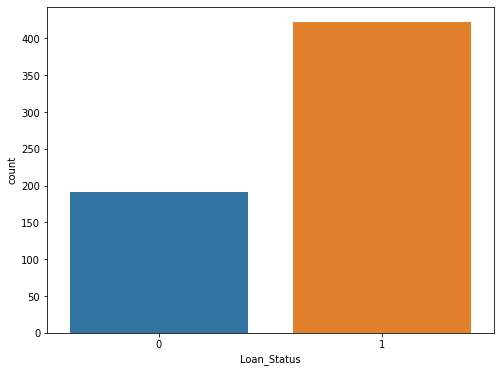

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes = target.value_counts()[0]/len(target)
no = target.value_counts()[1]/len(target)
print(f'le pourecentage des crédits accord est: {yes}')
print(f'le pourecentage des crédits non ccord est: {no}')
print(f'la cardinalité non accordé: {target.value_counts()[0]}')
print(f'la cardinalité: accordé {target.value_counts()[1]}')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


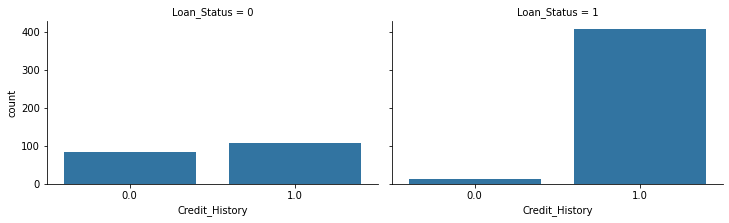

In [ ]:
#la champ de gens dont la demande est non agréée 0 et  agréée 1
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


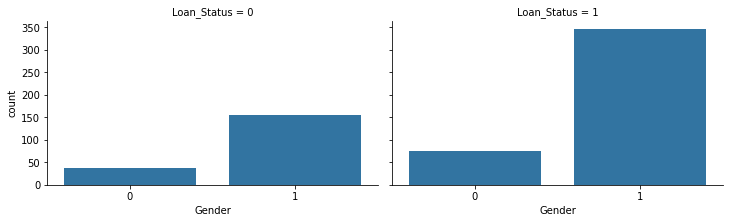

In [ ]:
#sexe
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

In [ ]:
#Married
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


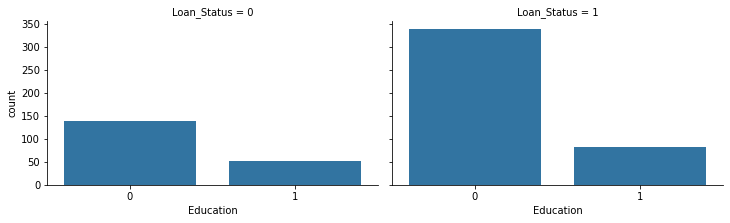

In [ ]:
#Education
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

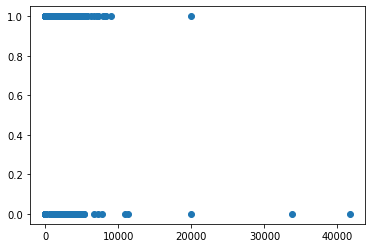

In [ ]:
#revenu du demandeur
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [ ]:
df.groupby('Loan_Status').median()

Gender  Married  Dependents  Education  Self_Employed  \
Loan_Status                                                          
0               1.0      1.0         0.0        0.0            0.0   
1               1.0      1.0         0.0        0.0            0.0   

             Property_Area  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status                                                                  
0                      1.0           3833.5              268.0       132.5   
1                      1.0           3812.5             1239.5       127.5   

             Loan_Amount_Term  Credit_History  
Loan_Status                                    
0                       360.0             1.0  
1                       360.0             1.0

In [ ]:
#diviser la base de données en une base de données test et d'entrainement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(X,y):
  X_train,X_test = X.iloc[train],X.iloc[test]
  y_train,y_test = y.iloc[train],y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('X_train taille: ', y_train.shape)
print('X_test taille: ', y_test.shape)

X_train taille:  (491, 11)
X_test taille:  (123, 11)
X_train taille:  (491,)
X_test taille:  (123,)


In [ ]:
#On va appliquer les 3 algorith => logistic regression, KNN, Decisison Tree
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# La fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la précision du modèle est: {acc}')

  #c'est la fonction d'application des modèles
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,': ')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('_'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression : 
la précision du modèle est: 0.8536585365853658
______________________________
KNeighborsClassifier : 
la précision du modèle est: 0.6504065040650406
______________________________
DecisionTreeClassifier : 
la précision du modèle est: 0.8455284552845529
______________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X_2=X[['Credit_History','Married','CoapplicantIncome']];



In [ ]:
#diviser la base de données en une base de données test et d'entrainement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test = X_2.iloc[train],X_2.iloc[test]
  y_train,y_test = y.iloc[train],y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('X_train taille: ', y_train.shape)

X_train taille:  (491, 3)
X_test taille:  (123, 3)
X_train taille:  (491,)


In [ ]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression : 
la précision du modèle est: 0.8536585365853658
______________________________
KNeighborsClassifier : 
la précision du modèle est: 0.6991869918699187
______________________________
DecisionTreeClassifier : 
la précision du modèle est: 0.8455284552845529
______________________________


In [ ]:
#Appliquer la logistic regression sur notre base de donnée
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

In [ ]:
#Enregister mon modele
pickle.dump(Classifier,open('model.pkl','wb'))